<AxesSubplot:xlabel='time'>

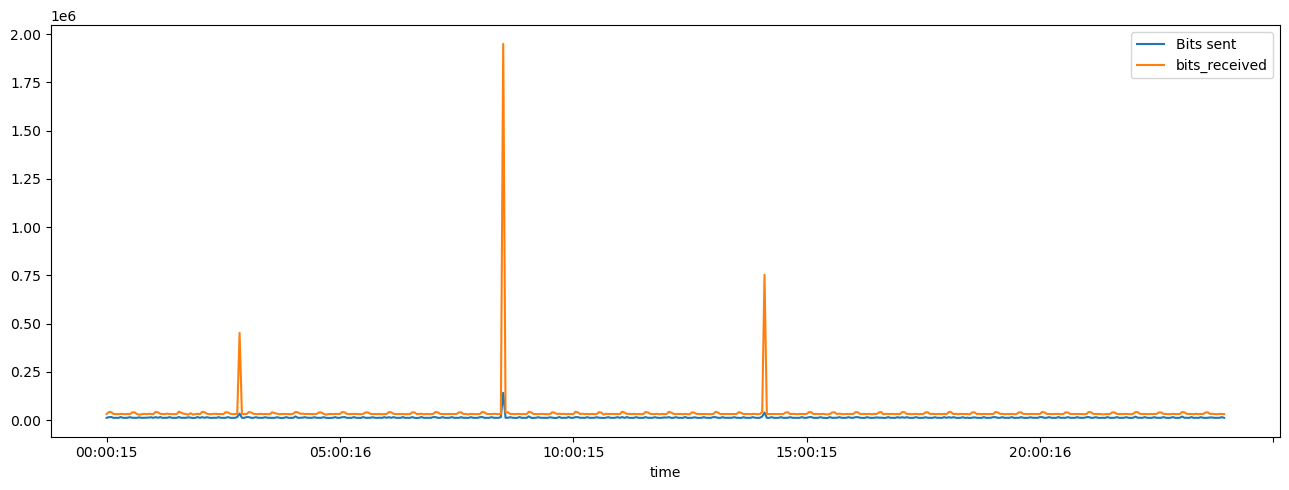

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

plt.rcParams["figure.figsize"] = [13.00, 5]
plt.rcParams["figure.autolayout"] = True

# 24hrs 19 Nov 2022 00:00 -> 23:59:59

cor_vlan114_sent_24h = pd.read_csv("data/COR/vlan114/bits-sent_24h.csv", delim_whitespace=True)
cor_vlan114_received_24h = pd.read_csv("data/COR/vlan114/bits-received_24h.csv", delim_whitespace=True)
cor_vlan114_sent_24h.sort_values(by="unix_time", inplace=True)
cor_vlan114_received_24h.sort_values(by="unix_time", inplace=True)

# 7 Days 14 Nov 2022 00:00:00 -> 20 Nov 2022 23:59:59

cor_vlan114_sent_7d = pd.read_csv("data/COR/vlan114/bits-sent_7d.csv", delim_whitespace=True)
cor_vlan114_received_7d = pd.read_csv("data/COR/vlan114/bits-received_7d.csv", delim_whitespace=True)
cor_vlan114_sent_7d.sort_values(by="unix_time", inplace=True)
cor_vlan114_received_7d.sort_values(by="unix_time", inplace=True)

# 1 Month

ax = cor_vlan114_sent_24h.plot.line(x="time", y="bits_sent", label="Bits sent")
cor_vlan114_received_24h.plot.line(x="time", y="bits_received", ax=ax)

<AxesSubplot:xlabel='date'>

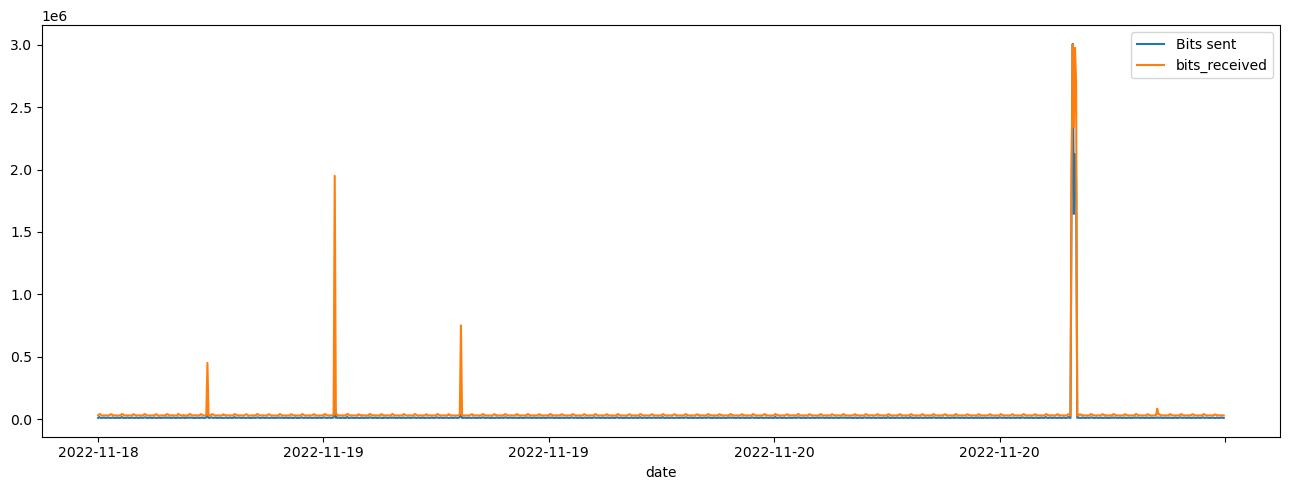

In [5]:
ax = cor_vlan114_sent_7d.plot.line(x="date", y="bits_sent", label="Bits sent")
cor_vlan114_received_7d.plot.line(x="date", y="bits_received", ax=ax)

In [5]:
table = PrettyTable()

table.field_names = ["Source", "Destination", "Bits Sent (avg) (Kbps)", "Bits Sent (min) (Kbps)", "Bits Sent (max) (Kbps)", "Bits Received (avg) (Kbps)", "Bits Received (min) (Kbps)", "Bits Received (max) (Kbps)"]
table.add_row("COR", "MHI", 19.67, 4, 4130, 48.2, 3.04, 23440.0)
table.add_row("COR", "MHI", 19.67, 4, 4130, 48.2, 3.04, 23440.0)

print(table)